# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\dxd4380\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


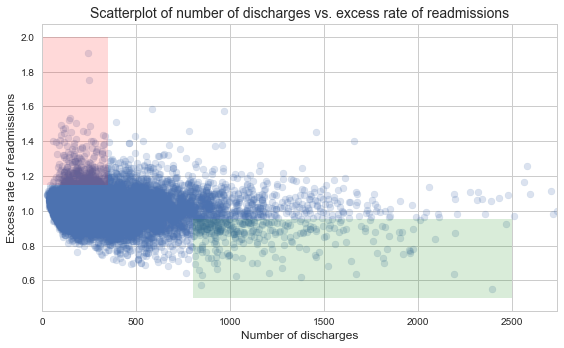

In [65]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Data Visualization

Before getting started visualize the data, I am using a hsitogram to understand how the values are distibuted.

C:\Users\dxd4380\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\dxd4380\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


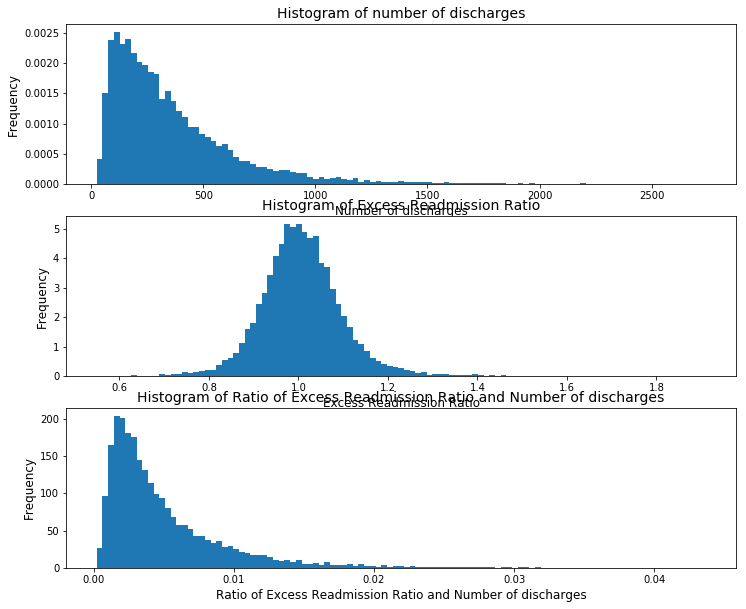

In [5]:
#Use square root rule to choose number of bins
n_bins = np.round_(np.sqrt(len(x)),decimals=0)
fig, ax = plt.subplots(3,figsize=(12,10))
ax[0].hist(x, bins=n_bins, normed=True)
ax[0].set_xlabel('Number of discharges', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_title('Histogram of number of discharges', fontsize=14)

ax[1].hist(y, bins=n_bins, normed=True)
ax[1].set_xlabel('Excess Readmission Ratio', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_title('Histogram of Excess Readmission Ratio', fontsize=14)

xysplit = [float(x) / float(y) for y,x in zip(x, y)]
ax[2].hist(xysplit, bins=n_bins, normed=True)
ax[2].set_xlabel('Ratio of Excess Readmission Ratio and Number of discharges', fontsize=12)
ax[2].set_ylabel('Frequency', fontsize=12)
ax[2].set_title('Histogram of Ratio of Excess Readmission Ratio and Number of discharges', fontsize=14)

plt.show()

Data is skewed towards the left with a long tail for the number of discharges. Majority of the hospitals have a Excess readmission ratio of 1. The study is focused on the outliers where the Excess readmission ratio is not 1.

### How strong is the correlation between number of discharges 

Draw a regression line through the data to find out the correlation in data

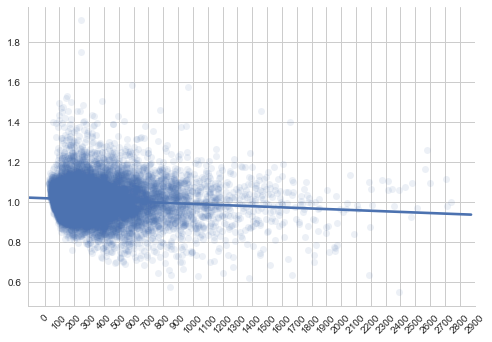

In [42]:
sns.set_style('whitegrid')
g=sns.regplot(np.asarray(x), np.asarray(y), ci=None,scatter_kws={'alpha':0.1})
g.set(xticks=np.arange(0,3000,100))
plt.xticks(rotation=45)
sns.despine() 


Calculate the Pearson correlation coefficient
- Pearson correlation coeeficient is a measure of how much the variability in two variables is due to them being correlated.
- Covariance/(standard deviation of x)* (standard deviation of y)
- Variability due to codependence/independent variability

In [7]:
# Compute correlation matrix: corr_mat
corr_mat = np.corrcoef(x, y)
# Return entry [0,1]
print(corr_mat[0,1])

-0.0930955428759


After observing the line of fit through the data, we can see the slight negative slope. Data is also concentrated around 0 to 700 discharges. OLS summary should give us an idea if the relationship between the two variables can be accepted.

In [66]:
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Fri, 22 Dec 2017   Prob (F-statistic):               0.00
Time:                        08:49:34   Log-Likelihood:                -11410.
No. Observations:               11494   AIC:                         2.282e+04
Df Residuals:                   11493   BIC:                         2.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0016   1.29e-05    126.892      0.000       0.002       0.002
==============================================================================
Omnibus:                     5334.415   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34639.723
Skew:                          -2.146   Prob(JB):                         0.00
Kurtosis:                      10.343   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The probability of observing determined F statistic or more extreme is zero, so the null hypothesis can be rejected. There is a linear relationship between the data

Let us investigate the following conclusion about hospitals/facilities with number of discharges > 1000 and hospitals/facilities with number of discharges < 1000

Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

Let us divide the data into three groups:
    - hospitals/facilities with number of discharges < 100 (group A)
    - hospitals/facilities with number of discharges > 100 and <1000 (group B)
    - hospitals/facilities with number of discharges > 1000 (group C)
    
The number of discharges with three new groups becomes a categorical variable and Excess Readmission Ratio is a contininuous variable. ANOVA(Analysis of variance) can be used to compare the variance within groups to variance between groups


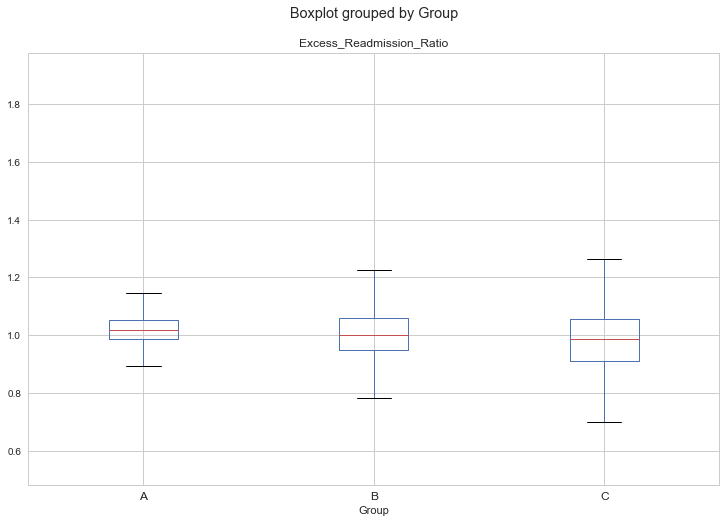

In [91]:
z = ['A' if member < 100 else 'B' if member<1000 else 'C' for member in x]

df = pd.DataFrame(
    {'discharges': x,
     'Excess_Readmission_Ratio': y,
     'Group': z
    })

df.boxplot('Excess_Readmission_Ratio', by='Group', figsize=(12, 8))

Box plot shows that the mean of readmission rates for hospitals with less than 100 discharges is above the other two groups. Mean of readmission rates for hospitals with more than 1000 discharges is slightly lower.

In [93]:
# F value and p value from ANOVA

#Method 1
grps = pd.unique(df.Group.values)
d_data = {grp:df['Excess_Readmission_Ratio'][df.Group == grp] for grp in grps}

from scipy import stats
 
F, p = stats.f_oneway(d_data['A'], d_data['B'], d_data['C'])

print(F)
print(p)


38.488719402
2.1892762194e-17


In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Excess_Readmission_Ratio ~ Group',data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq       df          F        PR(>F)
Group      0.646071      2.0  38.488719  2.189276e-17
Residual  96.443793  11491.0        NaN           NaN


High value of F and low p shows that there is high variation in the Excess Readmission rates in all three groups.

In [105]:
print("Mean of Excess Readmission Rate and Percentage of hospitals with Excess readmission rates more than 1:")

print("Overall")
print(np.mean(df['Excess_Readmission_Ratio']))
print((df[(df['Excess_Readmission_Ratio']>1.0)].count()['Excess_Readmission_Ratio']
       /df.count()['Excess_Readmission_Ratio'])*100)

print("For hospitals with discharges less than 100")
print(np.mean(df[(df['Group']=='A')]['Excess_Readmission_Ratio']))
print((df[(df['Group']=='A')&(df['Excess_Readmission_Ratio']>1.0)].count()['Excess_Readmission_Ratio']
       /df[(df['Group']=='A')].count()['Excess_Readmission_Ratio'])*100)

print("For hospitals with discharges between 100 and 1000")
print(np.mean(df[(df['Group']=='B')]['Excess_Readmission_Ratio']))
print((df[(df['Group']=='B')&(df['Excess_Readmission_Ratio']>1.0)].count()['Excess_Readmission_Ratio']
       /df[(df['Group']=='B')].count()['Excess_Readmission_Ratio'])*100)

print("For hospitals with discharges greater than 1000")
print(np.mean(df[(df['Group']=='C')]['Excess_Readmission_Ratio']))
print((df[(df['Group']=='C')&(df['Excess_Readmission_Ratio']>1.0)].count()['Excess_Readmission_Ratio']
       /df[(df['Group']=='C')].count()['Excess_Readmission_Ratio'])*100)

Mean of Excess Readmission Rate and Percentage of hospitals with Excess readmission rates more than 1:
Overall
1.007540917000168
51.6617365582
For hospitals with discharges less than 100
1.0226183501683506
63.2154882155
For hospitals with discharges between 100 and 1000
1.0070546775012648
50.6043676993
For hospitals with discharges greater than 1000
0.979070281995662
44.4685466377


#### Do you agree with the above analysis and recommendations? Why or why not?

Is there a correlation between number of hospitals and the Excess readmission rates?

I agree with the conculssion above. Based on OLS Summary, low F-statistic value tells us that the null hypothesis that there is no relationship between between number of hospitals and the Excess readmission rates can be rejected. Based on the least squares line of fit and the pearson correlation coefficient we can conclude that there is a slight negative correlation between the two variables. 

Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

Comparing smaller hospitals with the medium and large ones, we can see that there is a statistically significant variation in the data based on the ANOVA test. Smaller hospitals have higher mean Excess readmission rates and larger hospitals have lower Excess readmission rates.

References:
    
Pearson's coefficient test
https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/hypothesis-test-examples?ex=6

http://connor-johnson.com/2014/02/18/linear-regression-with-python/

Multiple subplots
https://matplotlib.org/examples/pylab_examples/subplots_demo.html

ANOVA in python
https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/